In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [17]:
test = False
filename = "test.txt" if test else "input.txt"

In [18]:
with open(filename) as file:
    lines_raw = file.readlines()

lines_raw = [line.strip() for line in lines_raw]
lines_raw = [line.split("->") for line in lines_raw]
node_to_tuple = lambda node: (int(node[1]), int(node[0]))
lines_raw = [[node_to_tuple(node.split(",")) for node in line] for line in lines_raw]
lines_raw = [np.array(line) for line in lines_raw]

max_x, max_y = 0, 0
min_x = [float("inf")]
for line in lines_raw:
    max_x = max(line[:, 1].max(), max_x)
    max_y = max(line[:, 0].max(), max_y)
    min_x = min(line[:, 1].min(), min_x)
print(lines_raw)
normalise_nodes = lambda line, offset: line - np.array([[0 ,offset]]*line.shape[0])
normalise_lines=lambda lines, offset: [normalise_nodes(line, offset) for line in lines]
lines=normalise_lines(lines_raw,min_x)
print(lines)

[array([[144, 495],
       [144, 499]]), array([[ 40, 492],
       [ 43, 492],
       [ 43, 484],
       [ 50, 484],
       [ 50, 499],
       [ 43, 499],
       [ 43, 496],
       [ 40, 496]]), array([[ 13, 499],
       [ 17, 499],
       [ 17, 497],
       [ 25, 497],
       [ 25, 505],
       [ 17, 505],
       [ 17, 502],
       [ 13, 502]]), array([[141, 504],
       [141, 508]]), array([[135, 498],
       [135, 502]]), array([[ 13, 499],
       [ 17, 499],
       [ 17, 497],
       [ 25, 497],
       [ 25, 505],
       [ 17, 505],
       [ 17, 502],
       [ 13, 502]]), array([[101, 511],
       [ 96, 511],
       [101, 511],
       [101, 513],
       [ 93, 513],
       [101, 513],
       [101, 515],
       [ 94, 515],
       [101, 515]]), array([[147, 485],
       [147, 490]]), array([[153, 483],
       [153, 488]]), array([[151, 479],
       [151, 484]]), array([[ 77, 490],
       [ 68, 490],
       [ 77, 490],
       [ 77, 492],
       [ 75, 492],
       [ 77, 492],
       [ 7

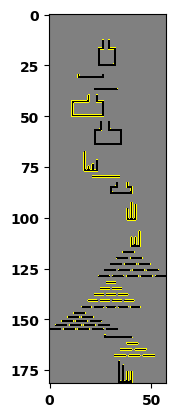

In [19]:
def reset_map(lines):
    scan:np.ndarray = np.zeros((max_y+1,max_x-min_x+1), dtype=int)
    for line in lines:
        for j in range(len(line)-1):
            nodes=line[j:j+2,:]
            start = np.min(nodes, axis=0,)
            end = np.max(nodes, axis=0, )+1
            scan[start[0]:end[0],start[1]:end[1]]=2
    return scan

def show_map(scan):
    colormap=ListedColormap(['gray','yellow', 'black'])
    _=plt.imshow(scan,cmap=colormap)
    plt.show()
scan = reset_map(lines)
show_map(scan)

In [20]:
def drop_sand(scan):
    origin=(np.array((0,500-min_x)))
    moves=np.array([[1,0],[1,-1],[1,1]])

    position=origin.copy()
    for _ in range(len(scan)-1):
        for move in moves:
            new_pos=position+move
            if scan[new_pos[0], new_pos[1]]==0:
                position+= move
                break
        else:
            break
    else: return True
    scan[position[0],position[1]]=1
    return False 

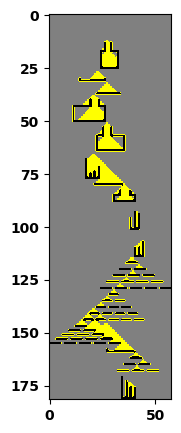

638


In [21]:
scan=reset_map(lines)
done=False
drops=-1
while not done:
    done=drop_sand(scan)
    drops+=1
_=plt.figure(figsize=(5,5))
show_map(scan)
print(drops)

# Part 2

In [22]:
def reset_map(lines, n_extra_cols=2):
    scan:np.ndarray = np.zeros((max_y+1+2,max_x-min_x+1+n_extra_cols), dtype=int) 
    for line in lines:
        for j in range(len(line)-1):
            nodes=line[j:j+2,:]
            start = np.min(nodes, axis=0,)
            end = np.max(nodes, axis=0, )+1
            scan[start[0]:end[0],start[1]:end[1]]=2
    scan[-1,:]=2
    return scan

In [23]:
max_x_offset = 1
min_x_offset = -1

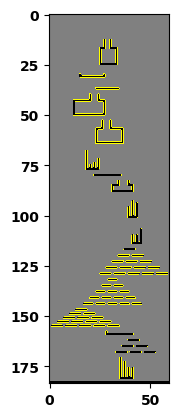

In [24]:
lines=normalise_lines(lines_raw,min_x+min_x_offset)
scan=reset_map(lines)
show_map(scan)

In [25]:
def drop_sand(scan, origin):
    moves=np.array([[1,0],[1,-1],[1,1]])
    new_col=np.array([0]*(max_y+2)+[2])[:,None]
    position=origin.copy()
    offset=0

    for _ in range(len(scan)-1):
        for move in moves:
            new_pos=position+move

            if new_pos[1]==0:
                scan=np.concatenate((new_col,scan),axis=1)
                done, scan, offset = drop_sand(scan,origin-np.array((0,offset)))
                offset-=1
                return done, scan, offset
            if new_pos[1]==scan.shape[1]-1:
                scan=np.concatenate((scan,new_col),axis=1)
                return drop_sand(scan,origin)
            
            if scan[new_pos[0], new_pos[1]]==0:
                position+= move
                break
        else:
            break
    else: return True,scan, offset
    scan[position[0],position[1]]=1
    if position[1]==0:
        scan=np.concatenate((new_col,scan),axis=1)
        offset=-1
    if position[1]==scan.shape[1]-1:
        scan=np.concatenate((scan,new_col),axis=1)
    return False,scan, offset 

31722


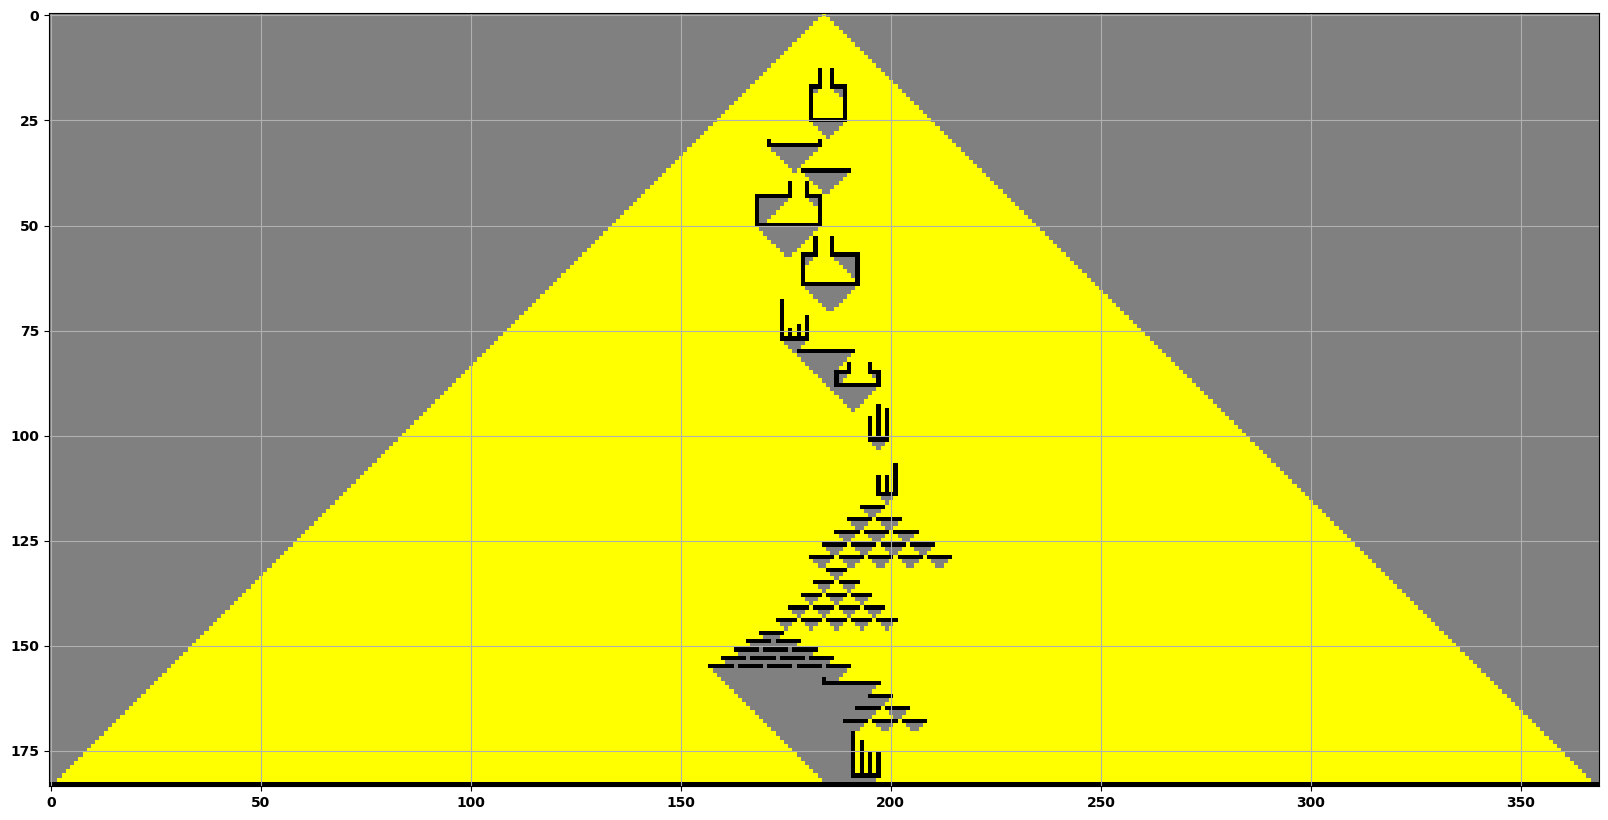

In [30]:
scan = reset_map(lines)
min_x_offset=-1
for drops in range(1,100000):
    origin=(np.array((0,500-(min_x+min_x_offset))))
    done, scan, offset = drop_sand(scan, origin)
    min_x_offset+=offset
    if done or scan[origin[0],origin[1]]:
        print(drops)
        break
plt.figure(figsize=(20,20))   
plt.grid()
show_map(scan)